### Title: <span style='color:red;'>US GUN VIOLENCE DATA ANALYSIS</span>

### Introduction:
##### Project Description
Human societies are plagued with several social issues that can be life-threatening at times. A notable case is the issue of gun violence in the United States which results in tens of thousands of deaths and injuries annually. In this project we perform a deep exploration of gun violence incidents reported in the US.

##### Dataset Description:
The datasert used in this project was obtained from [source](https://www.kaggle.com/jameslko/gun-violence-data)
##### Goal:
<span style='color:red;'>The goal of this project is to explore, clean, analyse, visualize and report information about GUN VIOLENCE data in US.</span>


#### Notes:
<div style='background:#AED6F1; padding:20px;'>
    <li> Some helper functions have been provided for you in the project folder to help you with some of the analyses. Use them as needed</li>
    <li>You may refere to <a href=''>this resource</a> for help visualizing your data as you want</li>
</div>


In order to complete your exploration of the dataset, here are a few question to guide you after you have prepared your data.

1. Exploring time-related trends in gun violence over time
    1. Number of Incidents per Year
    2. What is the average number of incidents per month
    3. What is the average number of incidents per weekday
    4. What is the overall trend (time series) of incidents, people killed and injured
    5. What is the most dangerous time of the year?


2. Exploring the Location Related Trends
    1. What is the total number of incidents by state?
    2. What is the total number of people killed & injured by state?
    7. What are the most common areas of gun violence incidents?

### Load Modules and Data

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline


import functions as fx   # these are functions i prepared earlier to perform routine steps quickly
from inspect import getmembers, isfunction

#### [Optional] Run the code below to see the functions in the helper file and what they do

In [2]:
# Run the code below to see the functions in the helper file and what they do
for i,obj in enumerate(getmembers(fx)):
    if isfunction(obj[1]):
        print(str(i) + ' ',obj[1].__name__, ' : ', obj[1].__doc__)

8  check_duplicates  :  Checks for duplicate records
    
    Params:
        df: pandas df
        count_unique: bool, return a count of the number of unique records with duplicate entries
    
9  get_participant_info  :  
    Takes text from any of the columns named participant_xxx and extracts the
    values in a list. The values in those columns are formatted as shown bellow:
    
    0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...	

    Parameters
    ----------
    txt : str
        text from the participant_type column.

    Returns
    -------
    list of participants types

    
12  preview_data  :  Easily preview any slice of the data
    
    Params:
        start: int, start index 
        end: int, end index
        
    Output:
        data slice
    
14  remove_duplicates  :  
    Parameters:
    ----------
    df: pandas df
    sort_by: columns to sort by
    subset: column name to check for duplicates
    
    Returns:
    -------
    dataframe with duplicates remove

In [3]:
# load data
file = 'data\guns.csv'
df = pd.read_csv(file)

### 1. Data quality Assessment
**Goal**:
To perform an initial assessment of the data quality that would allow us to go to the next steps of our analyses

To complete this step, examine the dataset for the following data quality issues:
- Accuracy of field values
- Missing values
- Duplicate entries

#### getting the number of columns and rows

In [4]:
df.shape 

(239677, 24)

The number of columns are <span style='color:blue;'>24</span> and the number of records are <span style='color:blue;'>239677</span>, and this confirmed the results we had while running the general explonatory data analysis. 

#### checking the data columns
in order to have an idea about the data variables, identify the relevant variables. 

In [5]:
df.columns


Index(['incident_id', 'date', 'state', 'city_or_county', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'latitude', 'location_description', 'longitude',
       'n_guns_involved', 'notes', 'participant_age', 'participant_age_group',
       'participant_gender', 'participant_relationship', 'participant_status',
       'participant_type', 'sources'],
      dtype='object')

I have identified columns like: <span style='color:red;'>incident_id, incident_url, source_url, and sources not relavant for our analysis</span> because they only contain URL data, incident_id and not relevant for our analysis and including it in the data does not allow the identification of duplicates. 


In [6]:
list_n=['incident_id','incident_url','source_url','sources']
for c in list_n:
    df=df.drop(columns=[c])

#### General Explanatory Data Analysis
Before diving into specific and individual data analysis of our Data, I want to run a general explanatory data analysis on the data in order to have an overview of the data, it will help me to know where to start from and what to focus on. i am using a package called pandas_profiling and i researched on it using this [source](https://towardsdatascience.com/speed-up-your-exploratory-data-analysis-with-pandas-profiling-88b33dc53625)

In [7]:
pandas_profiling.ProfileReport(df)

Number of variables,20
Number of observations,239677
Total Missing (%),21.9%
Total size in memory,35.0 MiB
Average record size in memory,153.0 B
Numeric,6
Categorical,13
Boolean,0
Date,0
Text (Unique),0
Rejected,1


#### Quick analysis
After running profiling report, We have have an overview of our data, the number of variables <span style='color:blue;'>(20)</span> because irrelavant variables have been deleted, the number of observations <span style='color:blue;'>(239677)</span>, the percentage of missing data <span style='color:blue;'>(21.9%)</span>, the varible types <span style='color:blue;'>(Numeric 6, Categorical 13)</span>, and warning about some variables(high cardinality). we can observe that some variables have a high level of missing data: <span style='color:blue;'>participant_relationship(93.4%), location_description(82.4%)</span>. The variable <span style='color:blue;'> incident_url_fields_missing </span>is rejected because it has a constant value False. the variables with warnings need to be cleaned. And also we have warning about duplicate rows <span style='color:blue;'> 321 duplicates</span>.  

####  Information about the data variables

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 20 columns):
date                           239677 non-null object
state                          239677 non-null object
city_or_county                 239677 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
gun_stolen                     140179 non-null object
gun_type                       140226 non-null object
latitude                       231754 non-null float64
location_description           42089 non-null object
longitude                      231754 non-null float64
n_guns_involved                140226 non-null float64
notes                          158660 non-null object
participant_age                147379 non-null object
participant_age_group          197558 non-null object
participant_gender        

This gives us the information about the variables type, it helps in order to indentify wrong data entries and also to observe variables that have missing values. so the data has four data types: <span style='color:blue;'>1 boolean, 4 float, 2 integer and 13 object. variables that do not have the total entries of 239677, contain missing values </span>.

#### Checking missing data 

In [9]:
df.isnull().any().any()

True

In [10]:
df.isnull().sum()

date                                0
state                               0
city_or_county                      0
n_killed                            0
n_injured                           0
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_relationship       223903
participant_status              27626
participant_type                24863
dtype: int64

This result shows the variables that contain missing values, they are variables that have the value True. And by checking the sum of missing variables per each columns, we can observe that <span style='color:blue;'>participant_relationship(223903), location_description(197588)</span> have very high number of missing data and that confirm the general explanatory data analysis we have conducted above <span style='color:blue;'>participant_relationship(93.4%), location_description(82.4%)</span>, they have more than half of their data missing. 

#### checking data type and values inconsistency
Here categorical variables are described to identify eventual inconsistency.
    

In [11]:
for c in df.columns:
    if df[c].dtype == object:
        print(df[c].describe())   

count       239677
unique        1725
top       1/1/2017
freq           342
Name: date, dtype: object
count       239677
unique          51
top       Illinois
freq         17556
Name: state, dtype: object
count      239677
unique      12898
top       Chicago
freq        10814
Name: city_or_county, dtype: object
count         140179
unique           349
top       0::Unknown
freq          121310
Name: gun_stolen, dtype: object
count         140226
unique          2502
top       0::Unknown
freq           93559
Name: gun_type, dtype: object
count      42089
unique     27594
top       Austin
freq         240
Name: location_description, dtype: object
count       158660
unique      136621
top       man shot
freq           501
Name: notes, dtype: object
count     147379
unique     18951
top        0::24
freq        3814
Name: participant_age, dtype: object
count           197558
unique             898
top       0::Adult 18+
freq             94671
Name: participant_age_group, dtype: object
coun

The categorical variables do not present inconsistency, it does not contain wrong data type, wrong values or incorrect data

#### describing the numerical variables to identify any inconsistency

In [12]:
df.describe()

,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved
count,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000
mean,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442
std,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202
min,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000
25%,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000
50%,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000
75%,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000
max,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000


The numerical variables do not present a lot of of inconsistency, it does not contain wrong data type or wrong values, but we can notice that first, second and third quartile are 0 for n_killed and; first, second quartile are 0  for n_injured variables. that is so because we have very high number of 0 killed and injured.

In [13]:
df['n_killed'].count()

239677

In [14]:
df.loc[df['n_killed']==0].count()[0]

185835

So for number of killed out of 239677 entries, we have 185835 number of 0 killed. and it is almost the same for number of injured. 

#### checking duplicates

In [15]:
#duplicates in the rows
any(df.duplicated())

True

The data contains duplicates, from the report analysis done above, we have <span style='color:blue;'> 321 duplicated rows </span>.  

### 2. Data Cleaning
Based on the data quality assessment youcarried out above, perform any preliminary cleaning on your data that you need in order to carry out with your exploration of the dataset

#### 2.1 Removing the rejected column

In [16]:
df=df.drop(columns=['incident_url_fields_missing'])

#### 2.2 Removing columns with hight level of missing values

In [17]:
missing_columns=['participant_relationship','location_description']
for c in missing_columns:
    df=df.drop(columns=[c])
df.columns

Index(['date', 'state', 'city_or_county', 'n_killed', 'n_injured',
       'congressional_district', 'gun_stolen', 'gun_type', 'latitude',
       'longitude', 'n_guns_involved', 'notes', 'participant_age',
       'participant_age_group', 'participant_gender', 'participant_status',
       'participant_type'],
      dtype='object')

#### 2.3 Imputing Categorical missing values
I am going to label the missing data by the value 'Missing', this is a technic that I have learnt using this [source](https://elitedatascience.com/data-cleaning). It will allow us to identify the missing values, without modifying the data

In [18]:
for c in df.columns:
    if df[c].dtype == object:
        df[c].fillna("Missing", inplace=True) 

#### 2.4 Imputing missing data in number of killed and number of injured columns
I going to use the median to replace the missing data, i have learnt this technic using this [source](https://www.datacamp.com/community/tutorials/data-preparation-with-pandas)

In [19]:
number_killed_median=int(df['n_killed'].median())
number_injured_median=int(df['n_injured'].median())
df['n_killed'].fillna(number_killed_median, inplace=True)
df['n_injured'].fillna(number_injured_median, inplace=True)

#### 2.5 Imputing missing data in longitude, latitude and congressional_district columns
I am going to replace the missing data by the value 0 which will be served as flag to identify missing values, this is a technic that I have learnt using this [source](https://elitedatascience.com/data-cleaning).

In [20]:
long_lat=['latitude','longitude','congressional_district']
for c in long_lat:
    df[c].fillna(0.0,inplace=True)

#### 2.6 Imputing missing data in number of guns involved columns

In [21]:
gun_involved_mean=df['n_guns_involved'].median()
df['n_guns_involved'].fillna(gun_involved_mean, inplace=True)
df.isnull().sum()

date                      0
state                     0
city_or_county            0
n_killed                  0
n_injured                 0
congressional_district    0
gun_stolen                0
gun_type                  0
latitude                  0
longitude                 0
n_guns_involved           0
notes                     0
participant_age           0
participant_age_group     0
participant_gender        0
participant_status        0
participant_type          0
dtype: int64

After dropping columns with hight level of missing data and imputing columns with missing data, our data does not contain missing values anymore.

#### 2.7 Removing duplicates rows

In [22]:
df.drop_duplicates(keep='first', inplace=True)
any(df.duplicated())

False

this below is the new shape of our data after data cleaning 239350 rows and 17 columns. The cleaned data does not contain duplicates, missing values and irrelavant columns anymore.

In [23]:
df.shape

(239350, 17)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239350 entries, 0 to 239676
Data columns (total 17 columns):
date                      239350 non-null object
state                     239350 non-null object
city_or_county            239350 non-null object
n_killed                  239350 non-null int64
n_injured                 239350 non-null int64
congressional_district    239350 non-null float64
gun_stolen                239350 non-null object
gun_type                  239350 non-null object
latitude                  239350 non-null float64
longitude                 239350 non-null float64
n_guns_involved           239350 non-null float64
notes                     239350 non-null object
participant_age           239350 non-null object
participant_age_group     239350 non-null object
participant_gender        239350 non-null object
participant_status        239350 non-null object
participant_type          239350 non-null object
dtypes: float64(4), int64(2), object(11)
memory usage:

### 3. Analysis & Visualization
In this section, I am going to use graphs to visualize our US gun violence Incidents dataset and make analysis.

#### 3.1 Feature Engineering

Before starting my visualization and analysis, I am going to do some feature engineering, make some modification to my data to make it easier to analyze. I will start by adding a column named inc_id, to allow the unique identification of each incident, now that the duplicates have been removed, we know each entry is unique. Also, I am going to split the column date into three separate columns(day, month and year), that will ease the analysis for each year and month. 

In [25]:
df['date']=pd.to_datetime(df['date'])
df['day']=df['date'].dt.day
df['month']=df['date'].dt.month_name()
df['year']=df['date'].dt.year
df['inc_id']=df.index+1
list_col=list(df.columns)
df=df[list_col[-1:]+list_col[:-1]]

#### 3.2 Frequency of the number of incident per year
I am going to use histogram graph to observe the distribution of the number of incident per year. I used this [source](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) for histogram documentation.

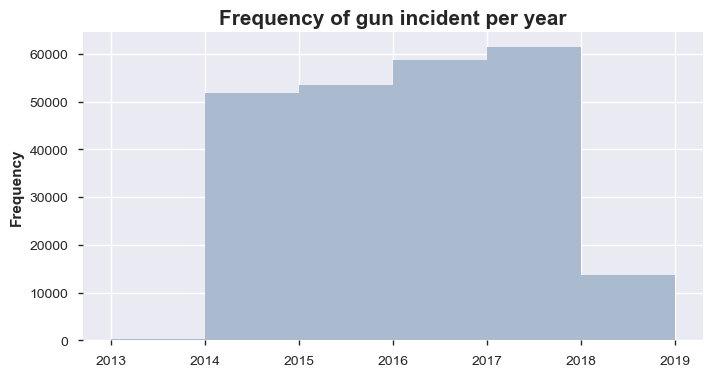

In [26]:
bins=[2013,2014,2015,2016,2017,2018,2019]
plt.figure(figsize=(8,4),dpi=100)
plt.hist(df['year'],bins=bins, color='#aabbcf')
plt.xticks(bins)
plt.ylabel('Frequency',fontdict={'fontweight':'bold'})
plt.title('Frequency of gun incident per year',fontdict={'fontweight':'bold','fontsize':15})
plt.show()

Observing the graph, I can say it is a left skewed data, because the data has an upper bound at the right side of the graph which is the frequency of gun incidents between 2017 and 2018. The frequency between 2018 and 2019 is very low, I believe the data is imcomplete at this stage, otherwise we would have observed a higher frequency. the frenquency between 2013 an 2014 is also abnormaly low, I believe this is also due to incomplete data. Aside these two incomplete data, I can conclude the frequency of gun incidents increase year by year and the highest frequency is between 2017 and 2018.  

#### 3.3 Evolution of the US gun violence incidence over time
#### Evolution over years

I am going to use some graphs to describe the evolution of US gun violence over years, since the data is imcomplete in 2013 and 2018, i will plot the line graph from 2014 to 2017. I use this [source](https://datatofish.com/plot-dataframe-pandas/) for line graph documentation

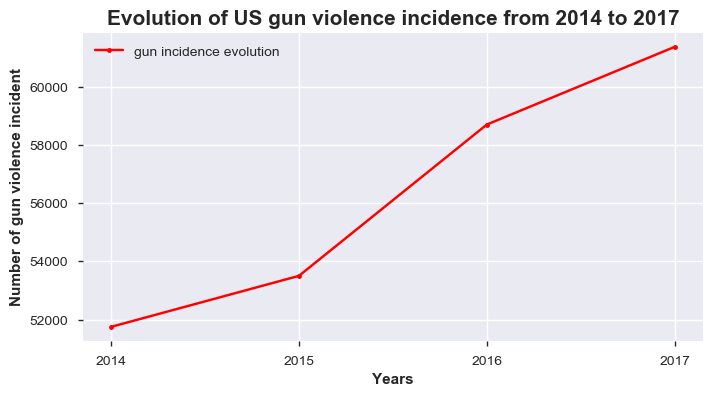

In [27]:
y_2013=df[df['year']==2013].count()[0]
y_2014=df[df['year']==2014].count()[0]
y_2015=df[df['year']==2015].count()[0]
y_2016=df[df['year']==2016].count()[0]
y_2017=df[df['year']==2017].count()[0]
y_2018=df[df['year']==2018].count()[0]
plt.figure(figsize=(8,4),dpi=100)
year=['2014','2015','2016','2017']
gun_violence=[y_2014,y_2015,y_2016,y_2017]
plt.plot(year,gun_violence,color='red',marker='.',label='gun incidence evolution')
plt.title('Evolution of US gun violence incidence from 2014 to 2017', fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('Years',fontdict={'fontweight':'bold'})
plt.ylabel('Number of gun violence incident',fontdict={'fontweight':'bold'})
plt.legend()
plt.show()

From the line graph, the number of US gun incident increases every year,  in 2014 we can observe about 52 thousand number of gun incidents, the number increase in 2015 to about 53 thousand, in 2016 it has increased again to about 59 thousand and in 2016 has reached it peaks with 62 thousand. 

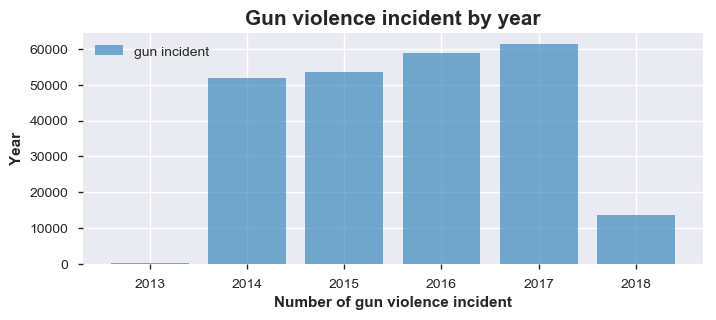

In [28]:
plt.figure(figsize=(8,3),dpi=100)
year=['2013','2014','2015','2016','2017','2018']
gun_violence=[y_2013,y_2014,y_2015,y_2016,y_2017,y_2018]
plt.bar(year,gun_violence, label='gun incident',alpha=0.6)
plt.title('Gun violence incident by year',fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('Number of gun violence incident',fontdict={'fontweight':'bold'})
plt.ylabel('Year',fontdict={'fontweight':'bold'})
plt.legend()
plt.show()

As observed with the line graph, the number of US gun violence incident increases every year, from 2014 to 2017 the number of US gun incident has increased by 10 thousand. I used this [souce](https://pythontic.com/pandas/dataframe-plotting/bar%20chart) for bar chart documentation

#### Average incident per month

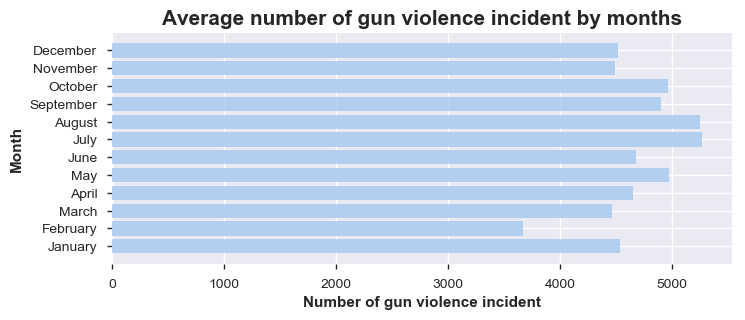

In [29]:
month=['January','February','March','April','May','June','July','August','September','October','November','December']
m_list=[]
for m in month:
    if (df['month']==m).any():
        v=(df[(df['month']==m)&(df['year'].isin(['2014','2015','2016','2017']))].count()[0])/4
        m_list.append(v)
plt.figure(figsize=(8,3),dpi=100)
plt.barh(month,m_list,alpha=0.9, color='#abcdef')
plt.title('Average number of gun violence incident by months',fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('Number of gun violence incident',fontdict={'fontweight':'bold'})
plt.ylabel('Month',fontdict={'fontweight':'bold'})
plt.show() 



From our graph, we observe that the months of July and August have the highest number of average number of gun violence incidents, there are about 5500 incidents every year. The month of February has the lowest number of average number of gun violence incidents about 3700 incidents reported every year. 

#### 3.4 Dates with high gun violence incident per year
To identify dates with high gun violence incidents for each year, I will describe the date variables to see the most frequente incident dates, and I will also look for the first three dates that have high incidents frequency.  
#### 2014

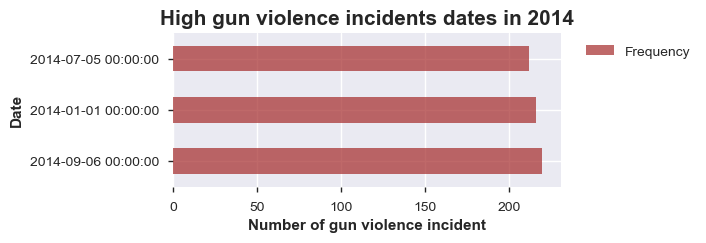

In [30]:
year_2014=df.loc[df['year']==2014]
p_2014=year_2014.groupby(['date']).agg({'inc_id':'count'}).sort_values("inc_id", ascending=False).rename(columns={'inc_id':'Frequency'}).head(3)
p_2014.plot.barh(color='brown',figsize=(5,2),alpha=0.7)
plt.legend(loc='upper center',bbox_to_anchor=(1.2, 1),fancybox=True, shadow=True, ncol=5)
plt.title('High gun violence incidents dates in 2014',fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('Number of gun violence incident',fontdict={'fontweight':'bold'})
plt.ylabel('Date',fontdict={'fontweight':'bold'})
plt.show()

From the result above, the most dangerous date in 2014 is <span style='color:red;'> the 6th September </span> with 220 number of gun incidents recorded, and that date is followed by <span style='color:red;'> the 1st January and 5th July </span>, 216 and 212 number of gun incidents recorded

#### 2015

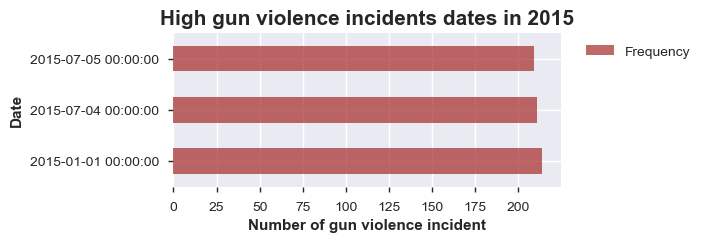

In [31]:
year_2015=df.loc[df['year']==2015]
p_2015=year_2015.groupby(['date']).agg({'inc_id':'count'}).sort_values("inc_id", ascending=False).rename(columns={'inc_id':'Frequency'}).head(3)
p_2015.plot.barh(color='brown',figsize=(5,2),alpha=0.7)
plt.legend(loc='upper center',bbox_to_anchor=(1.2, 1),fancybox=True, shadow=True, ncol=5)
plt.title('High gun violence incidents dates in 2015',fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('Number of gun violence incident',fontdict={'fontweight':'bold'})
plt.ylabel('Date',fontdict={'fontweight':'bold'})
plt.show()

From the result above, the most dangerous date in 2015 is <span style='color:red;'> the 1st January </span> with 214 number of gun incidents recorded, and that date is followed by <span style='color:red;'> the 4th and 5th July </span>, 211 and 209 number of gun incidents recorded.

#### 2016

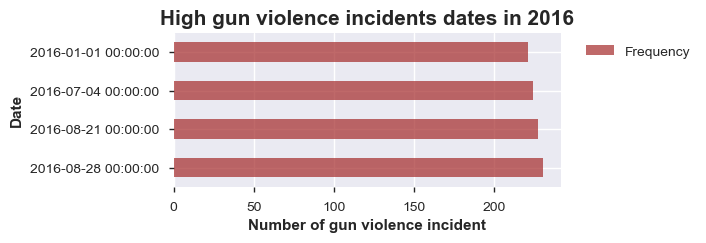

In [32]:
year_2016=df.loc[df['year']==2016]
p_2016=year_2016.groupby(['date']).agg({'inc_id':'count'}).sort_values("inc_id", ascending=False).rename(columns={'inc_id':'Frequency'}).head(4)
p_2016.plot.barh(color='brown',figsize=(5,2),alpha=0.7)
plt.legend(loc='upper center',bbox_to_anchor=(1.2, 1),fancybox=True, shadow=True, ncol=5)
plt.title('High gun violence incidents dates in 2016',fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('Number of gun violence incident',fontdict={'fontweight':'bold'})
plt.ylabel('Date',fontdict={'fontweight':'bold'})
plt.show()

From the result above, the most dangerous date in 2016 is <span style='color:red;'> the 28th August </span> with 230 number of gun incidents recorded, and that date is followed by <span style='color:red;'> 21st August, 4th July and 1st January </span>, 227, 224, and 221 number of gun incidents recorded.

#### 2017

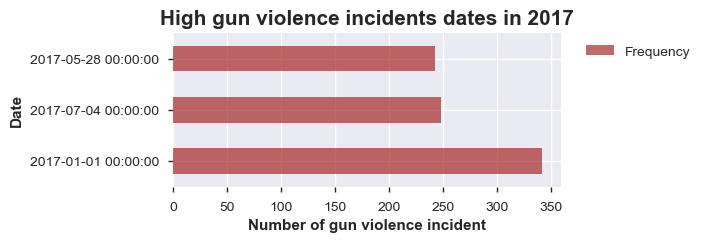

In [33]:
year_2017=df.loc[df['year']==2017]
p_2017=year_2017.groupby(['date']).agg({'inc_id':'count'}).sort_values("inc_id", ascending=False).rename(columns={'inc_id':'Frequency'}).head(3)
p_2017.plot.barh(color='brown',figsize=(5,2),alpha=0.7)
plt.legend(loc='upper center',bbox_to_anchor=(1.2, 1),fancybox=True, shadow=True, ncol=5)
plt.title('High gun violence incidents dates in 2017',fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('Number of gun violence incident',fontdict={'fontweight':'bold'})
plt.ylabel('Date',fontdict={'fontweight':'bold'})
plt.show()

From the result above, the most dangerous date in 2017 is <span style='color:red;'> the 1st January </span> with 348 number of gun incidents recorded, and that date is followed by <span style='color:red;'> the 4th July and 28th May </span>, 248 and 242 number of gun incidents recorded

#### 2018

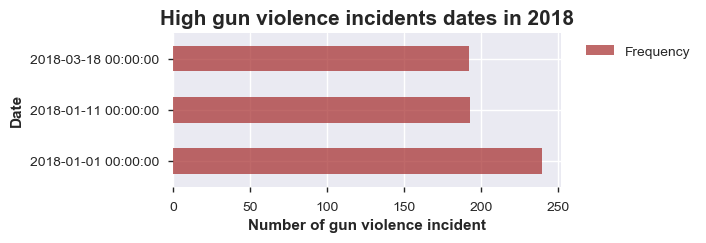

In [34]:
year_2018=df.loc[df['year']==2018]
p_2018=year_2018.groupby(['date']).agg({'inc_id':'count'}).sort_values("inc_id", ascending=False).rename(columns={'inc_id':'Frequency'}).head(3)
p_2018.plot.barh(color='brown',figsize=(5,2),alpha=0.7)
plt.legend(loc='upper center',bbox_to_anchor=(1.2, 1),fancybox=True, shadow=True, ncol=5)
plt.title('High gun violence incidents dates in 2018',fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('Number of gun violence incident',fontdict={'fontweight':'bold'})
plt.ylabel('Date',fontdict={'fontweight':'bold'})
plt.show()

From the result above, the most dangerous date in 2018 is <span style='color:red;'> the 1st January </span> with 240 number of gun incidents recorded, and that date is followed by <span style='color:red;'> the 11th July and 18th March </span>, 193 and 192 number of gun incidents recorded

FRom the above results, I have noticed 1st January to be the most dangerous date, because for each year we observe high level of gun violence incidents on that date; And the highest is in 2017, where we have 348 number of gun violence incidents recorded. Aside 1st January, dates like 4th and 5th July also have high level of gun violence incidents. So to conclude, I will say holidays are pontentials date of high gun violence incidents in US.

#### 3.5 Number of incident by state per year
I am going to use bar charts to show the number of incidents by every state for each year, it will help to identify states with high gun violence incidents in US per year.
#### 2014

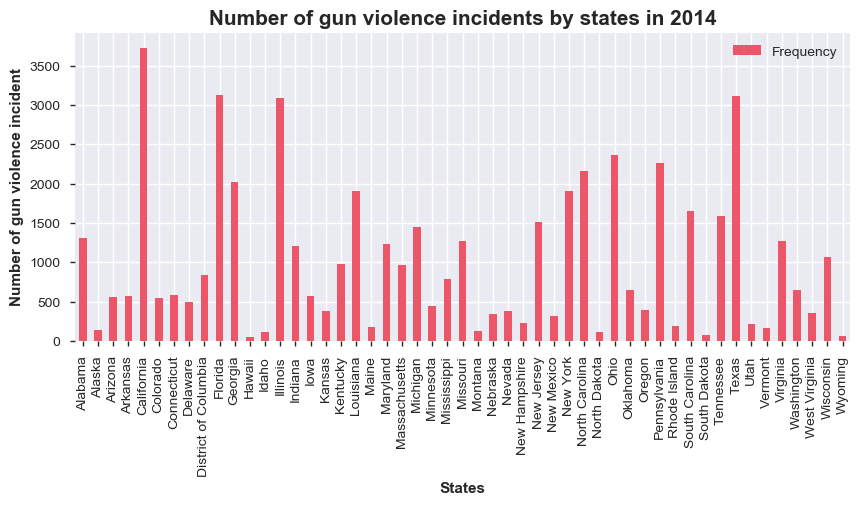

In [35]:
t=year_2014.groupby(['state']).agg({'inc_id':'count'}).rename(columns={'inc_id':'Frequency'}).plot.bar(color='#ed5569',figsize=(10,4))
plt.title('Number of gun violence incidents by states in 2014',fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('States',fontdict={'fontweight':'bold'})
plt.ylabel('Number of gun violence incident',fontdict={'fontweight':'bold'})
plt.show()

From the above graph, we can observe that in 2014, California state has the highest number of gun violence incident, about 4000 gun violence incidents recorded. Florida ans Texas have high incidents (about 3200), followed by Illinois (about 3100) incidents recorded. The state with lowest gun incidents is Hawai less than 100 incidents recorded. We also have Whyoming, south dakota(about 100 incidents); North dakota, Idaho (about 150 incidents); Montana, Alaska(about 200 incidents) which are some of the states with low gun violence incidents recorded  in 2014.
#### 2015

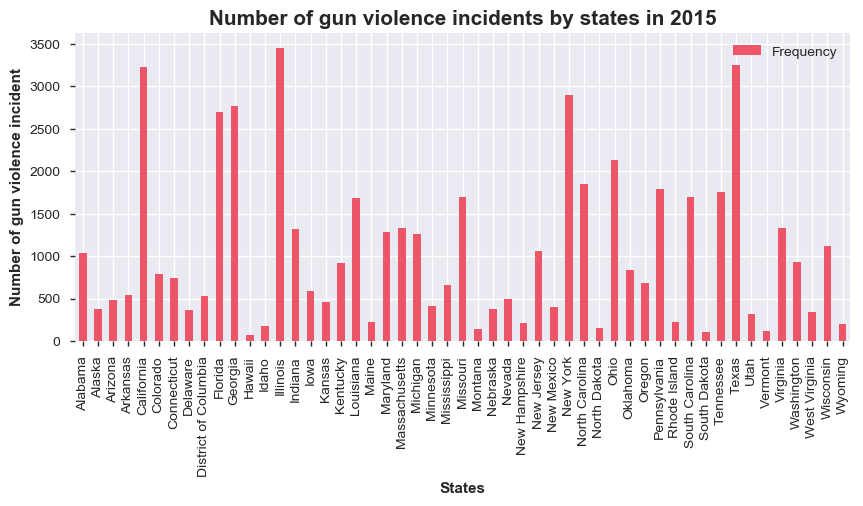

In [36]:
t=year_2015.groupby(['state']).agg({'inc_id':'count'}).rename(columns={'inc_id':'Frequency'}).plot.bar(color='#ed5569',figsize=(10,4))
plt.title('Number of gun violence incidents by states in 2015',fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('States',fontdict={'fontweight':'bold'})
plt.ylabel('Number of gun violence incident',fontdict={'fontweight':'bold'})
plt.show()

From the above graph, we can observe that in 2015, Illinois state has the highest number of gun violence incidents, about 3500 gun violence incidents recorded, the number has increased from last year by 400 incidents. We have Texas (about 3300) whose incidents number has also increased slightly by 100, then California (about 3200) whose incidents number has decreased by 800 and New York(2900) incidents recorded. The state with lowest gun incidents remains Hawai which has a little bit increased, we have about 100 incidents recorded. Some of the states with low number of incidents have experienced some small increase; Whyoming(230), south dakota(about 200), North dakota(210), Idaho (about 230); Alaska(about 400).
#### 2016

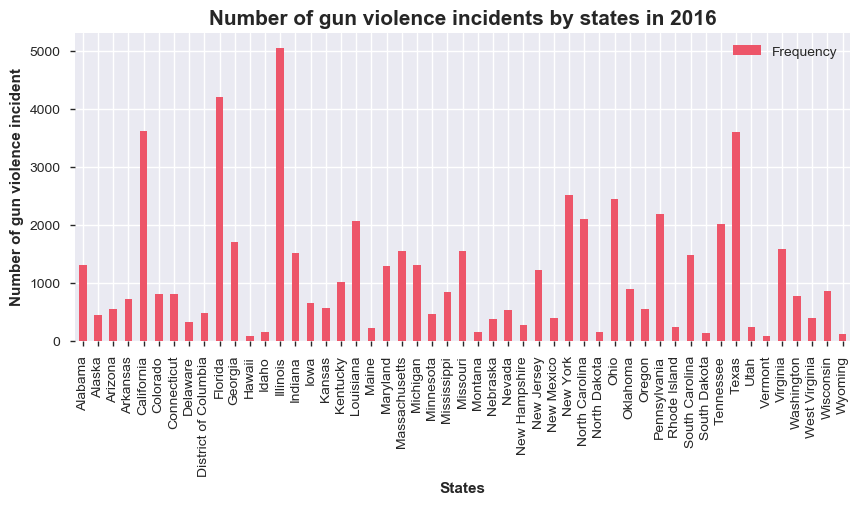

In [37]:
t=year_2016.groupby(['state']).agg({'inc_id':'count'}).rename(columns={'inc_id':'Frequency'}).plot.bar(color='#ed5569',figsize=(10,4))
plt.title('Number of gun violence incidents by states in 2016',fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('States',fontdict={'fontweight':'bold'})
plt.ylabel('Number of gun violence incident',fontdict={'fontweight':'bold'})
plt.show()

From the above graph, we can observe that in 2016, Illinois state still has the highest number of gun violence incidents, more than 5000, it has increased by 1500 incident from the previous year. Florida (about 4200) has also experienced an increase by 1500 incidents, then Texas (about 3600) which has also slightly increased by 300 and California(3600) also has increased by 200. The state with lowest gun incidents remains Hawai about 100 incidents recorded. some of the state with low incidents are still Whyoming, south dakota, North dakota), Idaho, Montana, they have about 200 number of gun violence incidents recorded.
#### 2017

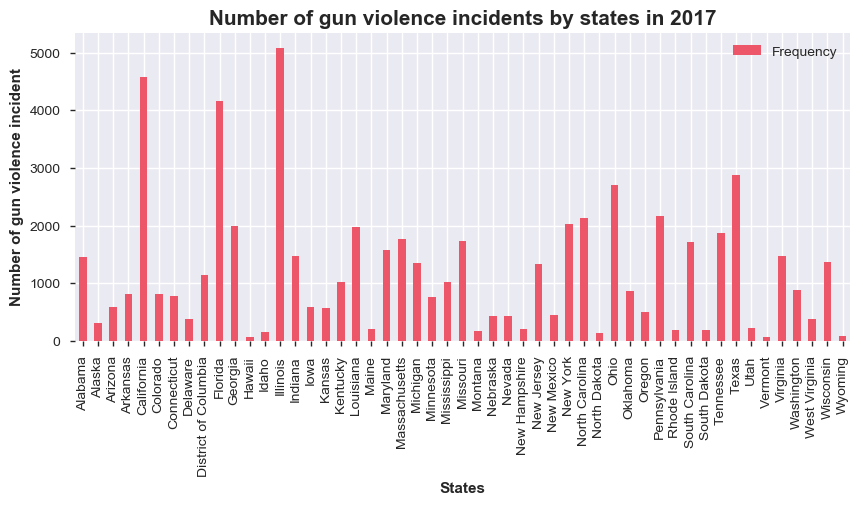

In [38]:
t=year_2017.groupby(['state']).agg({'inc_id':'count'}).rename(columns={'inc_id':'Frequency'}).plot.bar(color='#ed5569',figsize=(10,4))
plt.title('Number of gun violence incidents by states in 2017',fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('States',fontdict={'fontweight':'bold'})
plt.ylabel('Number of gun violence incident',fontdict={'fontweight':'bold'})
plt.show()

From the above graph, we can observe that in 2017, Illinois state still has the highest number of gun violence incidents with a constant figure, more than 5000 gun violence incidents recorded. Followed by California (about 4600) which has increased by 1000 from the previous year; then Florida (about 4100) which has also slightly decreased by 100 and Texas(2900) also has decreased by 700. The state with lowest gun incidents remains Hawai about 100 incidents recorded. some of the state with low incidents are still Whyoming, south dakota, North dakota, Idaho, Montana, they have about 200 gun violence incidents recorded.

To conclude, I will say although the fact that some states have experienced an increase an decrease in the number of gun violence incidents as time goes on, there are some states that have hight level of gun incidents such like <span style='color:red;'>Illinois, California, Florida and Texas</span>. And there are some state with low level of gun incidents such like <span style='color:blue;'>Whyoming, south dakota, North dakota, Idaho, Montana</span> and throughout years <span style='color:blue;'>Hawai</span> remains the state with the lowest level of incidents.

#### 3.6 Total number of killed people and incidents by states
I am going to use a bar chart to show the total number of incidents and killed people by state. It will help to identify states with high number of killed people and gun violence incidents in US.

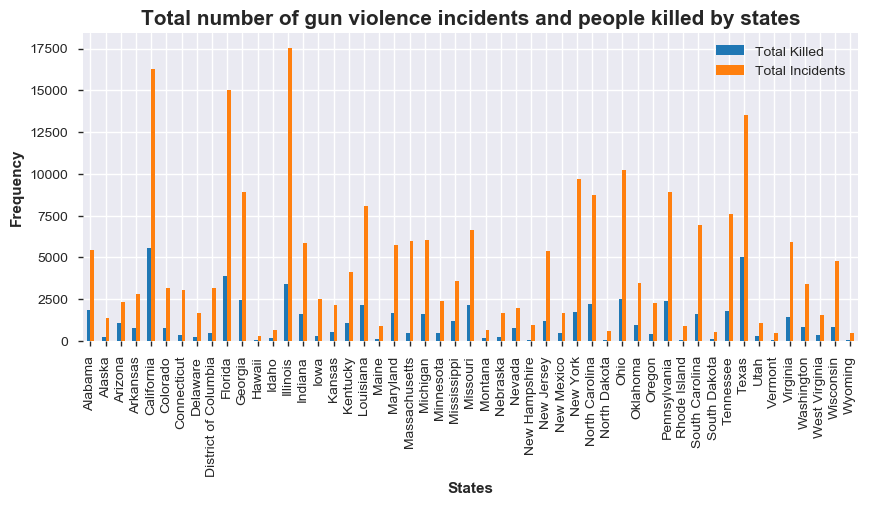

In [39]:
k=df.reset_index().groupby(by=['state']).agg({'n_killed':'sum', 'inc_id':'count'}).rename(columns={'inc_id':'Total Incidents','n_killed':'Total Killed'})
k.plot.bar(figsize=(10,4))
plt.title('Total number of gun violence incidents and people killed by states',fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('States',fontdict={'fontweight':'bold'})
plt.ylabel('Frequency',fontdict={'fontweight':'bold'})
plt.show()

From the graph above, though Illinois state has the highest total number of gun violence incidents recorded (17,500) followed by California(about 16,000), Florida(15,000) and Texas(about 13,000); California has the highest total number of people killed by gun(about 6000), followed by Texas(5000), Florida(about 4000) and Illinois(about 3500). the lowest number of people killed is in Hawai state(less than 100) it also has the lowest total number of incidents; North and south Dakota, vermont, Wyoming, Idaho and Montana are some of the states in US that have low total of gun violence incidents and that also have low number of people killed by gun.

#### 3.7 Total incidents, people injured and killed
I am going to use graph to show the comparison between number of incidents, people injured and killed.

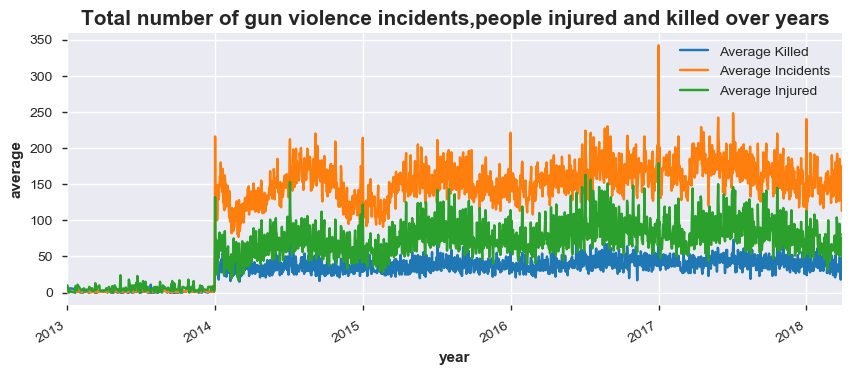

In [40]:
k=df.reset_index().groupby(by=['date']).agg({'n_killed':'sum', 'inc_id':'count','n_injured':'sum'}).rename(columns={'inc_id':'Average Incidents','n_killed':'Average Killed','n_injured':'Average Injured'})
k.plot.line(figsize=(10,4))
plt.title('Total number of gun violence incidents,people injured and killed over years',fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('year',fontdict={'fontweight':'bold'})
plt.ylabel('average',fontdict={'fontweight':'bold'})
plt.show()

From the graph above, gun violence incidents in average is higher than the average of people injured and killed. So when an incident occures, few people are injured or killed. 

#### 3.8 Frequency of number of injured and people killed  by gun
I am going to use graphs to show the frequency
of the number of people injured and killed by gun. This below are the four first results.
#### People killed 

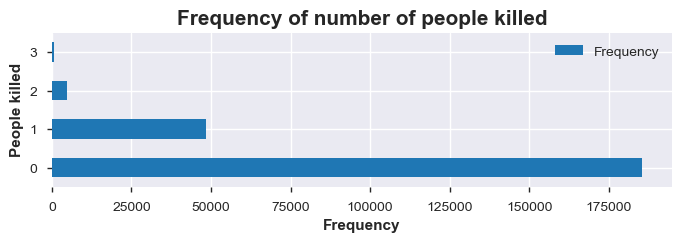

In [41]:
k=df.groupby(['n_killed']).agg({'inc_id':'count'}).rename(columns={'inc_id':'Frequency'}).head(4)
k.plot.barh(figsize=(8,2))
plt.title('Frequency of number of people killed',fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('Frequency',fontdict={'fontweight':'bold'})
plt.ylabel('People killed',fontdict={'fontweight':'bold'})
plt.show()

From the above graph, the frequency of zero people killed is the highest(about 180,000) and the frequency of three people  killed has very low value(about 600); That means that gun violence incidents that involve zero people killed are frequent while incidents that involve many killed people are rare. 
#### Number of injured people

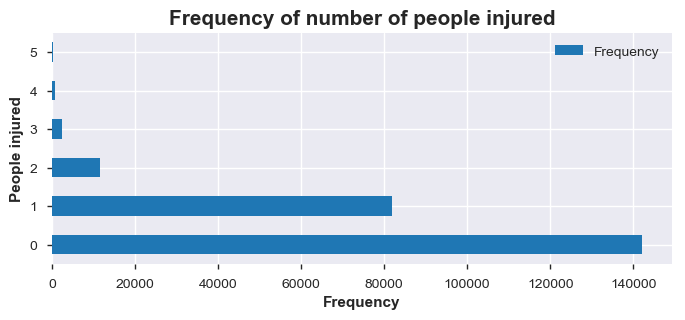

In [42]:
s=df.groupby(['n_injured']).agg({'inc_id':'count'}).rename(columns={'inc_id':'Frequency'}).head(6)
s.plot.barh(figsize=(8,3))
plt.title('Frequency of number of people injured',fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('Frequency',fontdict={'fontweight':'bold'})
plt.ylabel('People injured',fontdict={'fontweight':'bold'})
plt.show()

### Conclusion

This project was about analyzing US gun violence incidents dataset, the project were divided into three different parts: Data quality assessment, Data cleaning and Data analysis.
* Data quality assessment: the first part of the project was about exploring the data, during that part some issues were identified from the data, such as dulicated rows, missimg values, rejected columns, irrelevant columns.
* Data cleaning: the second part of the project was about cleaning the data, duplicated rows were deleted, rejected and irrelevant columns were also deleted, columns with very high level of missing values were also deleted, imputation technic was used to impute missing values.
* Data visualization and analysis: the third and last part was about using graphs to visualize and analyze the data. and the conclusion drawn from it is that
 - The US gun violence incidents increased year by year in four years it has increased by 10 thousand.
 - The US gun violence incidents mostly occure in the months of July and August
 - The US gun violence incidents mostly occure during holidays like 1st January, 4th and 5th July
 - The US gun violence incidents mostly occure in states like Illinois, California, Florida and Texas and occure less in  Hawai, Whyoming, south dakota, North dakota, Idaho, Montana 
 - California, Texas, Florida and Illinois have high number of people killed by gun while Hawai, Whyoming, south dakota, North dakota, Idaho, Montana have the lowest.
 - The number of gun violence incidents is high but it involves low number of people injured and killed
 - gun violence incidents involving many people injured or killed are rare while gun violence incidents involving few people injured or killed are frequente.